<a href="https://colab.research.google.com/github/thomascerbelaud/M2-IPE-data-energy/blob/main/notebooks/5_2_Principal_Component_Analysis_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 5.1: Principal Component Analysis

This notebook covers various cases when principal component analysis can be useful in machine learning. For instance, it can be used for data compression, visualisation, and feature extraction.

## Using PCA for visualization and clustering

PCA can be a powerful tool to extract visualize high-dimensional data distribution in 2D or 3D. Furthermore, the learned features (a linear combination of the original features) are often more expressive and robust for downstream tasks like clustering, regression or classification.

In this section we demonstrate its use on the IRIS dataset. It consists of 150 samples of iris flowers, with 50 samples from each of three species: Setosa, Versicolour, and Virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width, stored in a 150x4 numpy.ndarray where the rows represent the samples and the columns represent the features. The dataset is available through the `load_iris()` function in scikit-learn, which returns the data and target variables, with the target being an array of integers (0 for Setosa, 1 for Versicolour, and 2 for Virginica) corresponding to the species.

### Load dataset

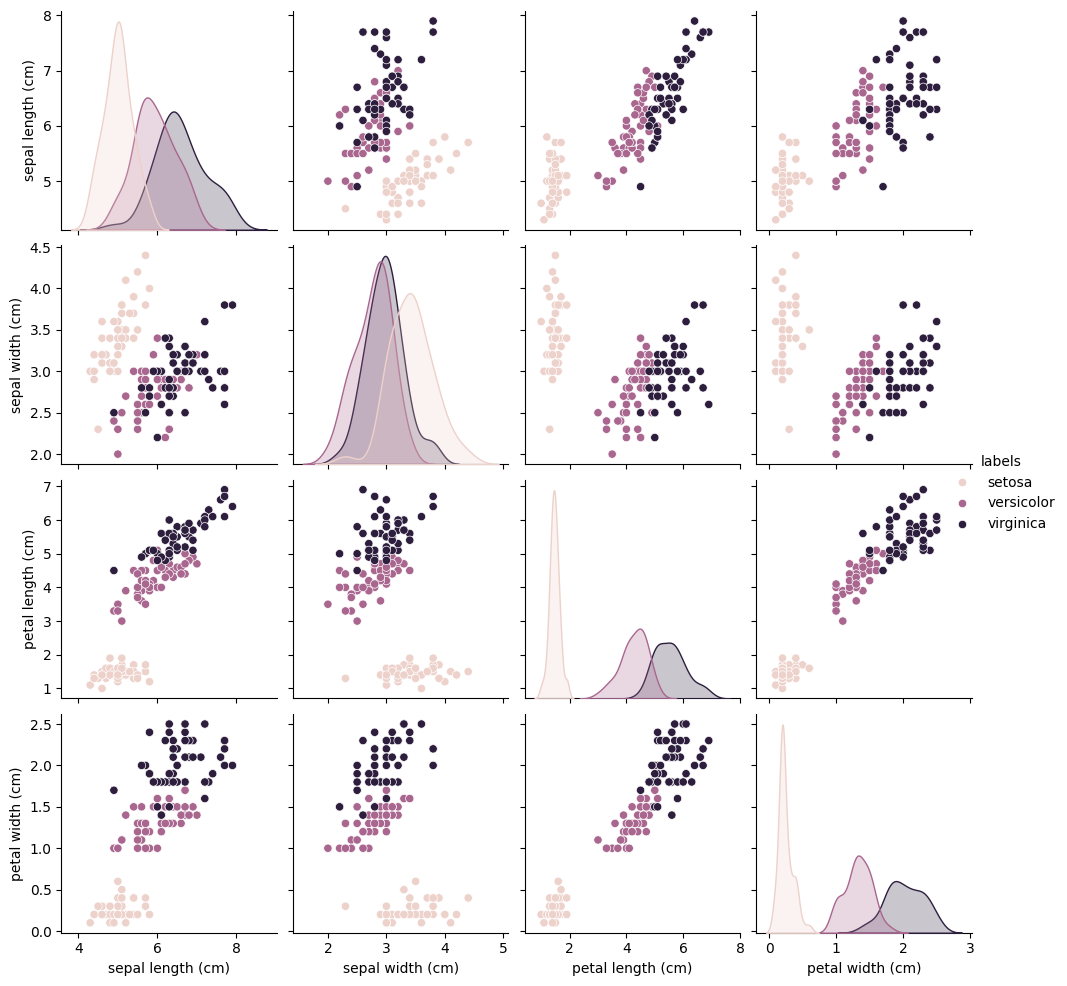

In [1]:
from sklearn.datasets import load_iris

bunch = load_iris()
X = bunch.data
y = bunch.target

# print(bunch.DESCR)

import seaborn as sns
import pandas as pd
import numpy as np

data = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1))
data.columns = bunch.feature_names + ["labels"]
g = sns.pairplot(data, hue="labels")
legend = g.legend
for text, label in zip(legend.get_texts(), bunch.target_names):
    text.set_text(label)

In [2]:
# Uncomment to display dataset description
# print(bunch.DESCR)

### PCA

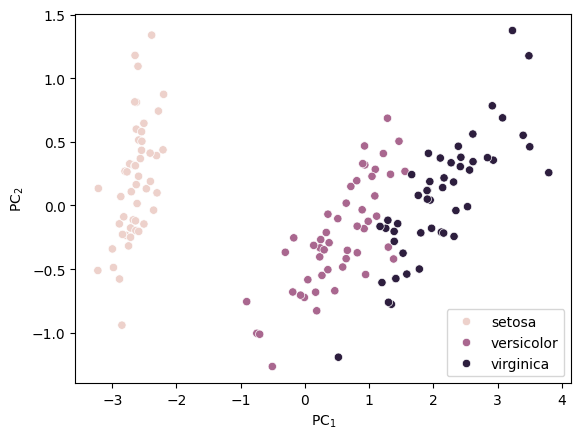

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# TODO: project the IRIS dataset into a 2D basis of the first principal components, and visualize it.
# What do you see?
pca = PCA(n_components=2).fit(X)
X_reduced = pca.transform(X)
pc_1, pc_2 = X_reduced.T

sns.scatterplot(x=pc_1, y=pc_2, hue=y)
plt.xlabel("PC$_1$")
plt.ylabel("PC$_2$")
legend = plt.gca().get_legend()
for text, label in zip(legend.get_texts(), bunch.target_names):
    text.set_text(label)

## Face recognition

PCA can be applied to images as well, either for compression or feature extraction. We will use a dataset made of the faces of member of various governments. The goal is then, given a new face, to predict whose face is it.

*N.B.: this is largely inspired from [scikit-learn example](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html).*

### Load dataset

In [4]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("picture dimensions: %d x %d" % (h, w))

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
picture dimensions: 50 x 37


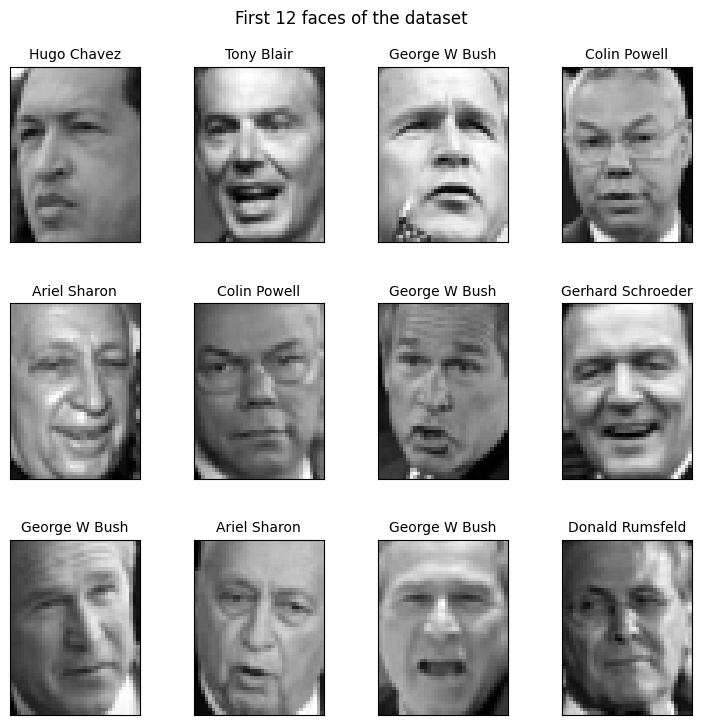

In [5]:
import matplotlib.pyplot as plt


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())


titles = [target_names[label] for label in y[:12]]
images = X[:12]
plot_gallery(images, titles, h, w)
plt.suptitle("First 12 faces of the dataset");

### Split and scale dataset

In [6]:
# TODO: split data set into train and test set, and scale the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

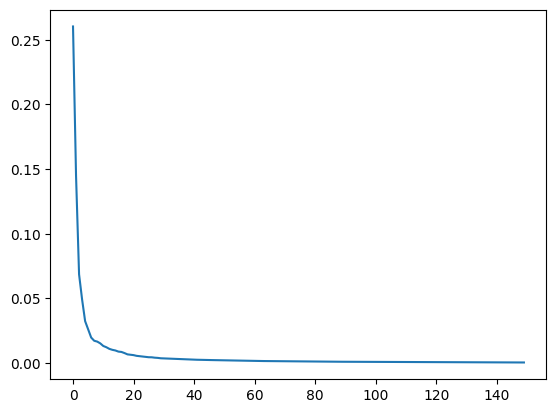

In [7]:
# TODO: Project the images into a basis of dimension 150 using PCA.
from sklearn.decomposition import PCA

n_components = 150
pca = PCA(n_components=n_components, whiten=True, svd_solver="randomized").fit(X_train)
plt.plot(pca.explained_variance_ratio_)

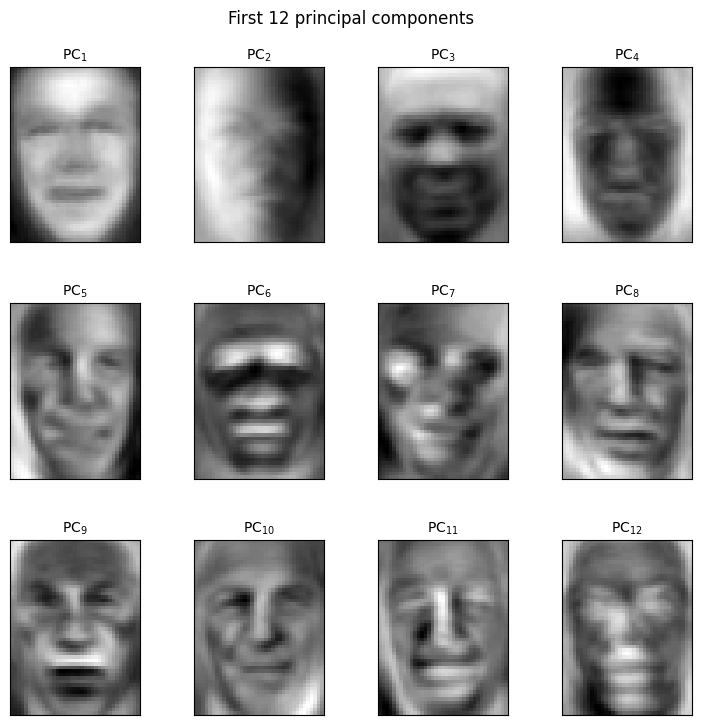

In [8]:
# The code below displays the first 12 principal components. You can think of the
# principal components as features that are crafted from the raw images pixels.
n_components_to_display = 12
titles = [f"PC$_{{{i + 1}}}$" for i in range(n_components_to_display)]
plot_gallery(pca.components_[:n_components_to_display], titles, h, w)
plt.suptitle(f"First {n_components_to_display} principal components");

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


def classification_report_and_plot(y_test: np.ndarray, X_test: np.ndarray, target_names: list[str], model: BaseEstimator):
    """Make classification report and plots."""
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names))

    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, display_labels=target_names, xticks_rotation="vertical"
    )
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.78      0.88      0.83        60
  Donald Rumsfeld       0.67      0.74      0.70        27
    George W Bush       0.94      0.92      0.93       146
Gerhard Schroeder       0.88      0.84      0.86        25
      Hugo Chavez       0.85      0.73      0.79        15
       Tony Blair       0.87      0.75      0.81        36

         accuracy                           0.85       322
        macro avg       0.79      0.78      0.79       322
     weighted avg       0.86      0.85      0.85       322



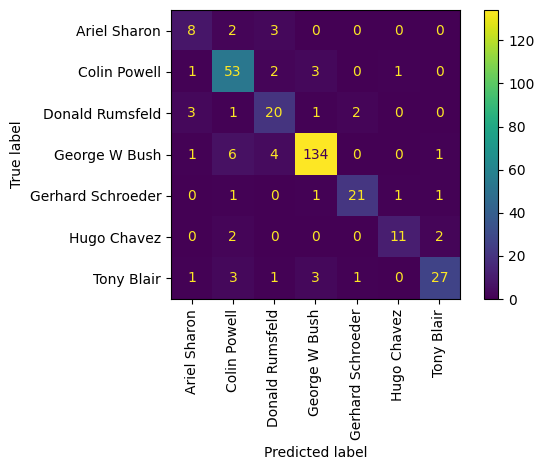

In [10]:
# TODO: train a logistic regression on the data projected on the principal components
# What do you see?
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs")
lr.fit(X_train, y_train)
classification_report_and_plot(y_test, X_test, target_names, lr)

                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.83      0.88      0.85        60
  Donald Rumsfeld       0.73      0.70      0.72        27
    George W Bush       0.88      0.92      0.90       146
Gerhard Schroeder       0.76      0.64      0.70        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.74      0.64      0.69        36

         accuracy                           0.82       322
        macro avg       0.75      0.72      0.73       322
     weighted avg       0.81      0.82      0.81       322



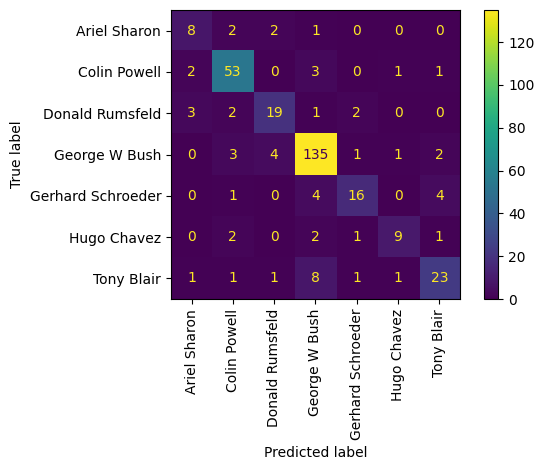

In [11]:
# TODO: train a neural network classifier (MLP)
# use different activation functions. What do you see?

from sklearn.neural_network import MLPClassifier

# TODO: try relu and logistic activations?
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, learning_rate="constant", activation="relu")
mlp.fit(X_train, y_train)
classification_report_and_plot(y_test, X_test, target_names, mlp)

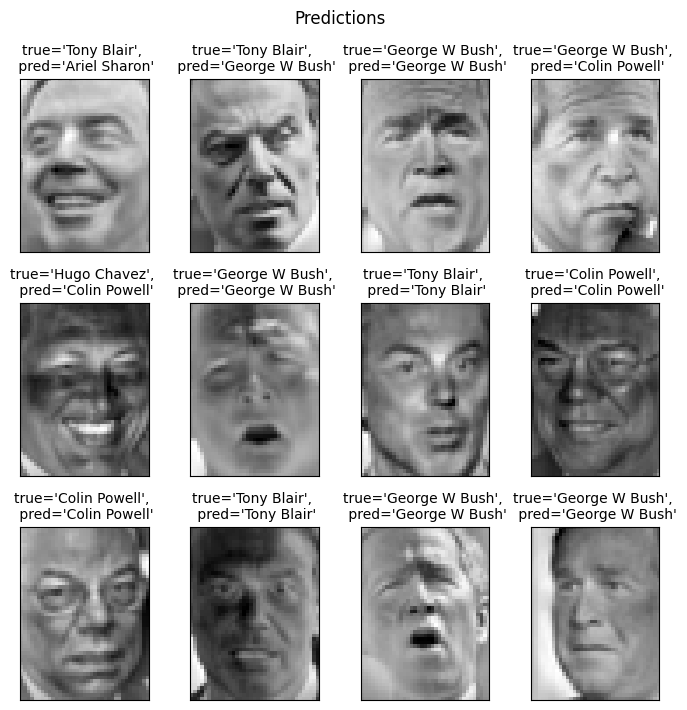

In [12]:
# TODO: plot predictions with their labels
idx = np.random.choice(len(y_test), 12)
images = X_test[idx]
classes = mlp.predict(images)
true_labels = [str(target_names[label]) for label in y_test[idx]]
predicted_labels = [str(target_names[label]) for label in classes]
titles = [f"{true=}, \n {pred=}" for true, pred in zip(true_labels, predicted_labels)]
plot_gallery(images, titles, h, w)
plt.suptitle("Predictions");
plt.tight_layout();